In [1]:
# Useful libraries to visualize maps 
library(ggplot2)
library(sp)
library(maps)
library(maptools)
library(mapproj)
library(mapdata)

Checking rgeos availability: TRUE


Warning message:
“Ignoring unknown aesthetics: x, y”

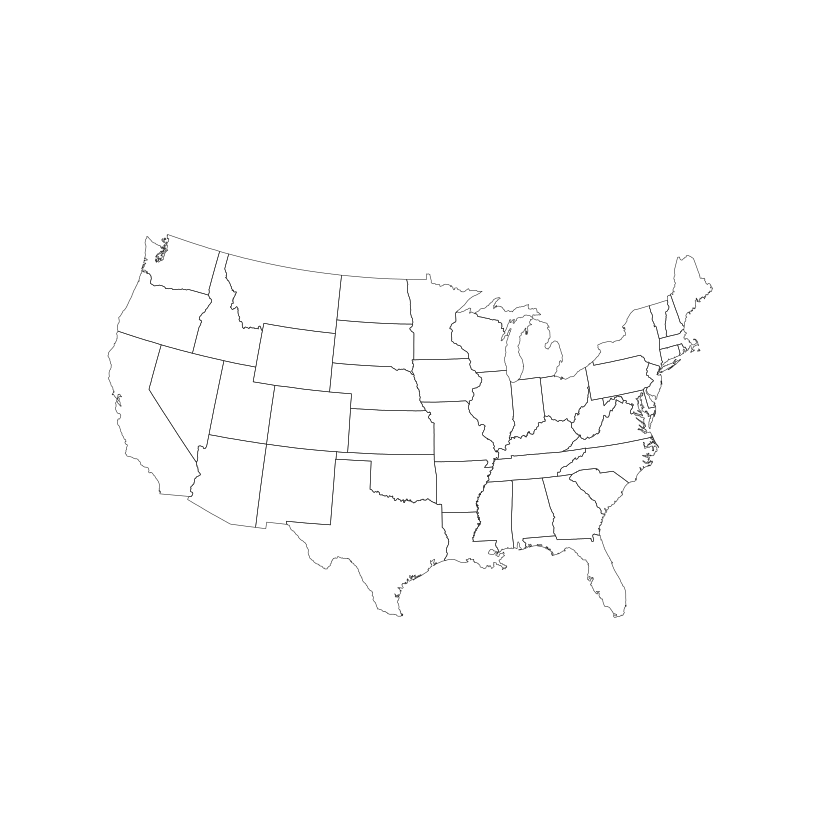

In [2]:
# get the US state data 
us <- map_data("state")

gg <- ggplot() + geom_map(data=us, map=us, aes(long, lat, map_id=region), color="#222222", fill=NA, size=0.15)
# this is a good projection for US
gg <- gg + coord_map("polyconic")
gg <- gg + theme_void() 
gg 

Warning message:
“Ignoring unknown aesthetics: x, y”

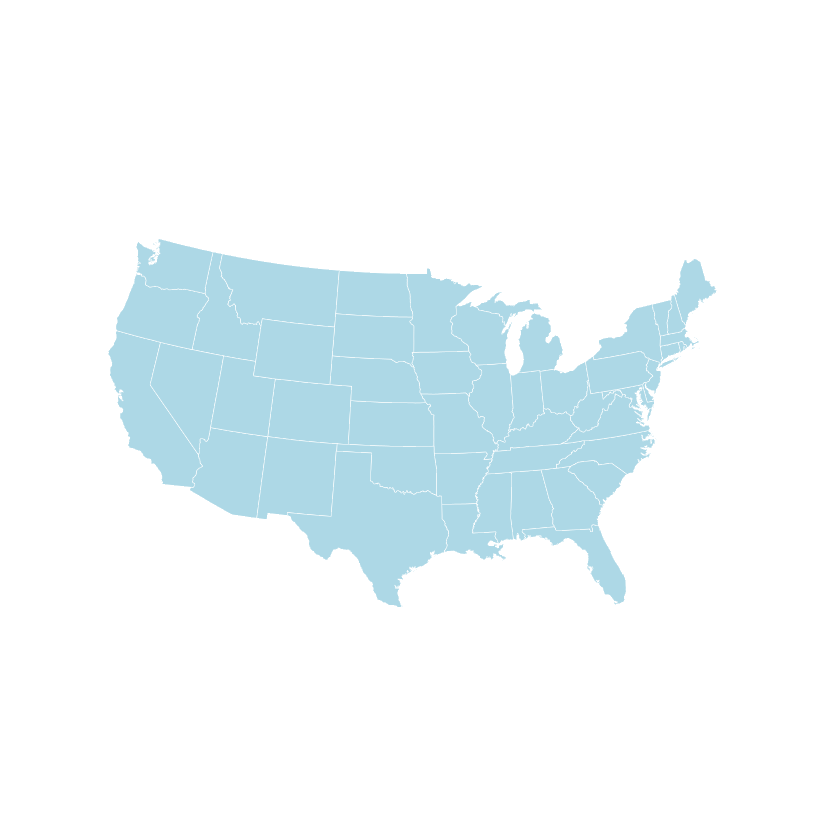

In [3]:
gg <- ggplot() + geom_map(data=us, map=us, aes(long, lat, map_id=region), color="white", fill="lightblue", size=0.15)
#This is better projection
gg <- gg + coord_map("albers", lat0=30, lat1=40)
gg <- gg + theme_void()
gg

Warning message:
“Ignoring unknown aesthetics: x, y”Warning message:
“Ignoring unknown aesthetics: x, y”Warning message:
“Ignoring unknown aesthetics: x, y”

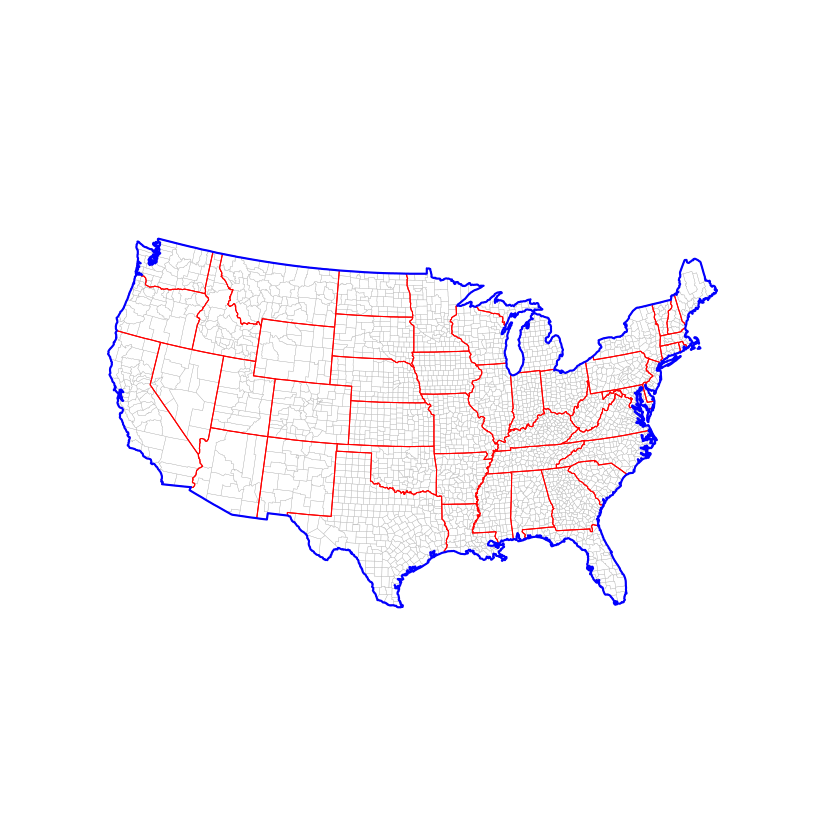

In [4]:
# This is how we can get data for different levels of detail and use different layers to overlay them. 

state <- map_data("state")
county <- map_data("county")
usa <- map_data("usa")

gg <- ggplot()
gg <- gg + geom_map(data=county, map=county,
                    aes(long, lat, map_id=region),
                    color="grey", fill=NA, size=0.1)
gg <- gg + geom_map(data=state, map=state,
                    aes(long, lat, map_id=region),
                    color="red", fill=NA, size=0.3)
gg <- gg + geom_map(data=usa, map=usa,
                    aes(long, lat, map_id=region),
                    color="blue", fill=NA, size=0.6)
gg <- gg + coord_map("albers", lat0=30, lat1=40)
gg <- gg + theme_void()
gg

Warning message:
“Ignoring unknown aesthetics: x, y”

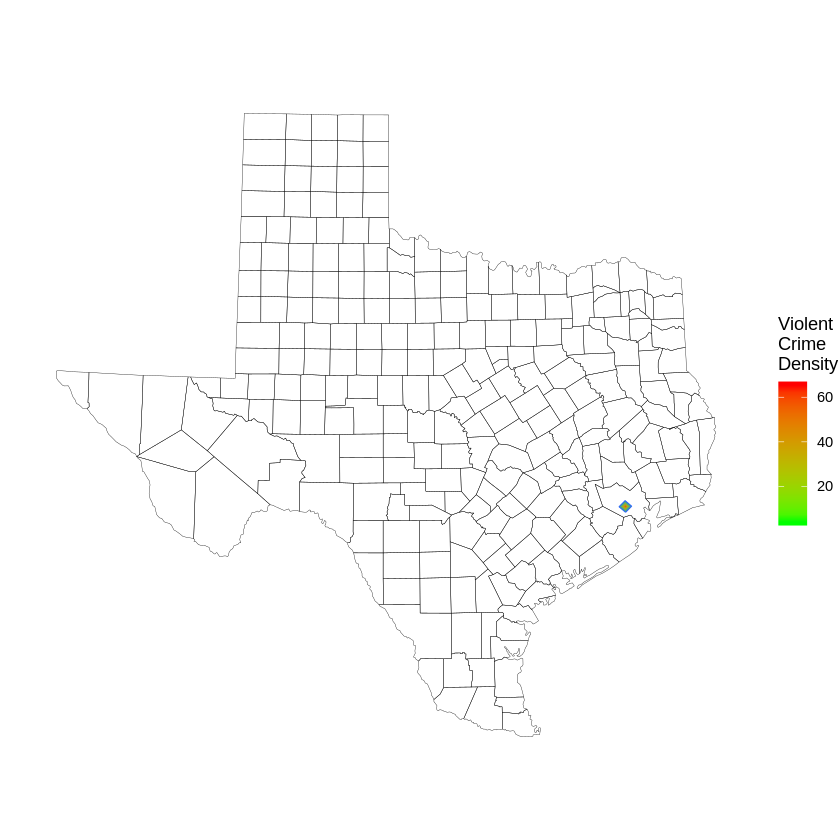

In [5]:
# Do a crime plot similar to the spatial practice without using any base layers. 

library(ggmap)
#str(crime)

## Let's do a crime plot on downtown Houston 

# pick only violent crimes
violent_crimes <- subset(crime,offense != "auto theft" & offense != "theft" & offense != "burglary")
# rank violent crimes
violent_crimes$offense <- factor(violent_crimes$offense, levels = c("robbery", "aggravated assault","rape", "murder"))

# restrict to downtown
violent_crimes <- subset(violent_crimes, -95.39681 <= lon & lon <= -95.34188 & 29.73631 <= lat & lat <= 29.78400)


#Let's pick Texas
tx <- county[which(county$region=="texas"),]

harris <- county[which(county$subregion=="harris" & county$region=="texas"),]


gg <- ggplot()
gg <- gg + geom_map(data=tx, map=tx,
                    aes(x=long, y=lat, map_id=region),
                    color="black", fill=NA, size=0.1)
gg <- gg + coord_map("polyconic")

gg <- gg + theme_void()


gg <- gg + geom_density2d(data = violent_crimes, aes(x = lon, y = lat), size = 0.3) + 
stat_density2d(data = violent_crimes, aes(x = lon, y = lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
scale_fill_gradient("Violent\nCrime\nDensity",low = "green", high = "red") + 
scale_alpha(range = c(0.1, 0.4), guide = FALSE)

gg

Warning message:
“Ignoring unknown aesthetics: x, y”

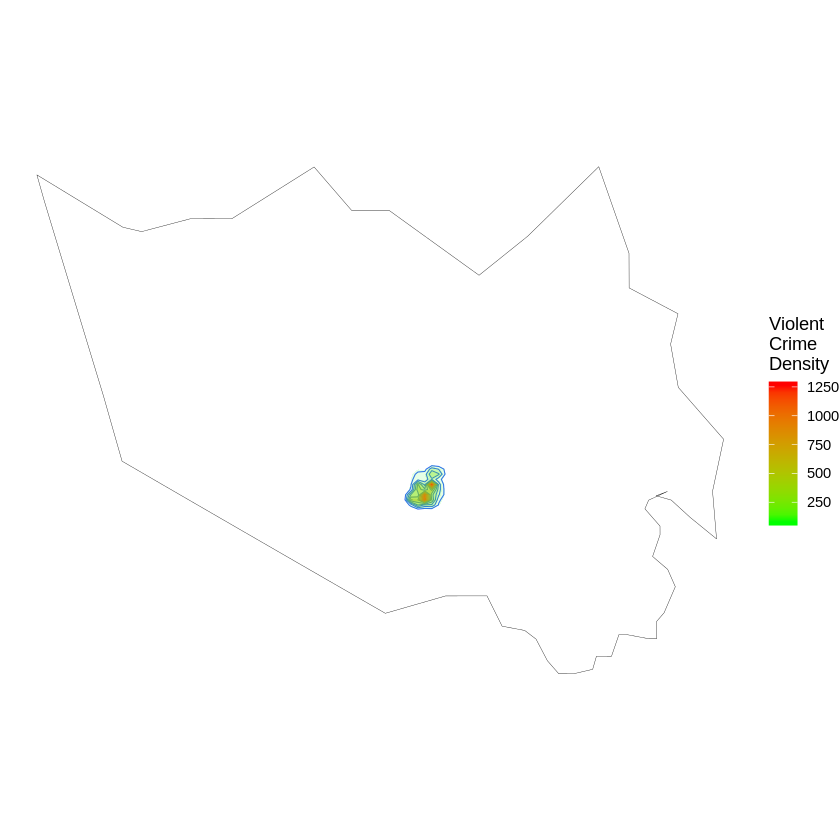

In [6]:
# do it on Harris county 

gg2 <- ggplot()
gg2 <- gg2 + geom_map(data=harris, map=harris,
                    aes(x=long, y=lat, map_id=region),
                    color="black", fill=NA, size=0.1)
gg2 <- gg2 + coord_map("polyconic")

gg2 <- gg2 + theme_void()


gg2 <- gg2 + geom_density2d(data = violent_crimes, aes(x = lon, y = lat), size = 0.3) + 
stat_density2d(data = violent_crimes, aes(x = lon, y = lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
scale_fill_gradient("Violent\nCrime\nDensity",low = "green", high = "red") + 
scale_alpha(range = c(0.1, 0.4), guide = FALSE)

gg2